# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

C:\Users\jabhi\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jabhi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\jabhi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### User Data

In [2]:
# Read user data
u_cols = ['user_id','age','gender','occupation','zipcode']
users = pd.read_csv('./data/u.user', sep='|', names=u_cols,  encoding='latin-1')
users = users.drop(["zipcode"], axis = 1)

# Create age groups
bins = [0, 20, 30, 40, 50, 60, np.inf]
ages = ['<20', '20-29', '30-39','40-49', '51-60', '60+']
users['age_group'] = pd.cut(users['age'], bins, labels=ages)
users = users.drop(["age"], axis = 1)

users.head()

,user_id,gender,occupation,age_group
0,1,M,technician,20-29
1,2,F,other,51-60
2,3,M,writer,20-29
3,4,M,technician,20-29
4,5,F,other,30-39


In [3]:
# Generate user features as a sparse matrix
columnsToEncode = ['age_group','gender','occupation']
myEncoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
myEncoder.fit(users[columnsToEncode])

user_features = pd.concat([users.drop(columnsToEncode, 1), 
                           pd.DataFrame(myEncoder.transform(users[columnsToEncode]), 
                                        columns = myEncoder.get_feature_names_out(columnsToEncode))], axis=1).reindex()

user_features.head()

,user_id,age_group_20-29,age_group_30-39,age_group_40-49,age_group_51-60,age_group_60+,age_group_<20,gender_F,gender_M,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,occupation_healthcare,occupation_homemaker,occupation_lawyer,occupation_librarian,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Movies Data

In [4]:
# Read movies data
movie_columns = ["movie_id", "movie_title", "release_date", "video_release_date", "IMDb_URL", 
                  "unknown", "Action", "Adventure","Animation","Children's","Comedy","Crime","Documentary","Drama","Fantasy",
                  "Film-Noir","Horror", "Musical", "Mystery","Romance","Sci-Fi","Thriller", "War","Western"]
movies = pd.read_csv('./data/u.item', sep='|', names=movie_columns, encoding='latin-1')
movies.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [5]:
# Generate movie features as a sparse matrix
movie_features = movies.drop(['movie_title','release_date', 'video_release_date', 'IMDb_URL'],axis = 1)
movie_features

,movie_id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,1679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,1680,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,1681,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Ratings Data

In [6]:
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('./data/u.data', sep='\t', names=r_cols, encoding='latin-1')
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [9]:
# Get a sensing of ratings' distribution
ratings['rating'].value_counts()

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

<AxesSubplot:>

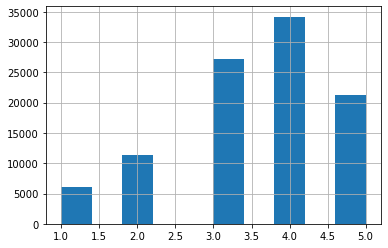

In [10]:
ratings['rating'].hist()

### Top Movies

In [8]:
# Get ids of top 50 movies
top_movies_index = ratings.groupby('movie_id').count().sort_values('user_id', ascending=False).head(50).reset_index()['movie_id']

# Filter datasets
top_movie_features = movie_features[movie_features['movie_id'].isin(top_movies_index)]
filtered_data = ratings[ratings['movie_id'].isin(top_movies_index)].reset_index(drop=True)

filtered_data['reward'] = np.where(filtered_data['rating'] < 4, 0, 1)

filtered_data.head()

,user_id,movie_id,rating,timestamp,reward
0,186,302,3,891717742,0
1,62,257,2,879372434,0
2,200,222,5,876042340,1
3,291,118,2,874833878,0
4,308,1,4,887736532,1


<AxesSubplot:>

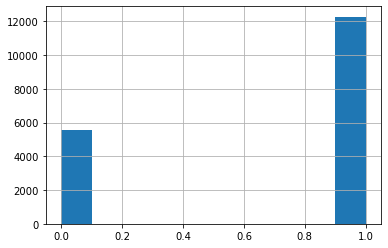

In [11]:
# Get a sensing of rewards' distribution
filtered_data['reward'].hist()

### Randomize Data

In [ ]:
np.random.seed(4014)
filtered_data = filtered_data.reindex(np.random.permutation(filtered_data.index)).reset_index(drop = True)